<a href="https://colab.research.google.com/github/SantiagoVillarreal01/aprendizaje-automatico-252601/blob/main/4_4_M%C3%A9todos_de_clustering_basados_en_particiones_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


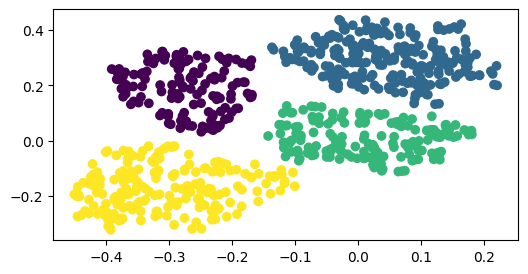

In [3]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [4]:
# PASO 1 elejir los medoides iniciales de forma randomica
def paso1_elije_medoides(K, Dx):
  # Elegimos los centros iniciales entre el conjunto de datos
  cDx = Dx[np.random.choice(Dx.shape[0], K, replace=False)]## P1. Tu código aquí ##
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[-0.364234  -0.0382092]
 [-0.031306   0.203421 ]
 [-0.251788  -0.24018  ]
 [ 0.122865   0.0181702]]


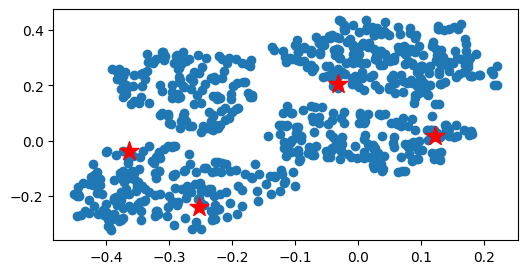

In [5]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [6]:
# Definimos la distancia euclidiana de una instancia x
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i,:], cDx)## P2. Tu código aquí ##

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

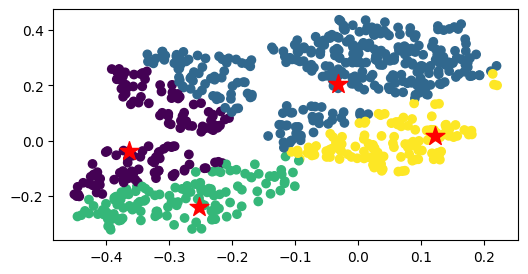

In [7]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [11]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # En este caso lo que buscamos es el elemento del cluster que reduce la
      # distancia con respecto a todos los demás elementos. Para ello, calculamos
      # las distancias entre todos los elementos del cluster `k` y las almacenamos
      # en `mat`.

      # Primero, obtenemos un vector binario indicando qué elementos de Dyp pertenecen a k
      indices_elementos_k = Dx[Dyp == k] ## P3. Tu código aquí ##

      # Si el clúster está vacío, mantenemos el medoide anterior. (Caso de un clúster sin puntos)
      if indices_elementos_k.shape[0] == 0:
          continue

      # Luego calculamos las distancias entre cada uno de los elementos de `Dx`
      # que nuestra predicción dice que pertenecen al custer `k` y los demás.
      mat =  matriz_distancias(indices_elementos_k, distancia_euclidiana) ## P4. Tu código aquí ##

      # Ahora buscamos el elemento con menor distancia dentro del
      # cluster `k` y nos quedamos con su índice (usando np.argmin, que busca
      # el mínimo de un vector y nos devuelve su índice).
      ic = np.where(Dyp == k)[0][np.argmin(np.sum(mat, axis=1))]

      # Asignamos como centro del cluster al elemento del cluster que ofrece
      # la menor distancia con respecto a todos los demás
      cDx[k,:] = Dx[ic, :] ## P5. Tu código aquí ##
  return cDx

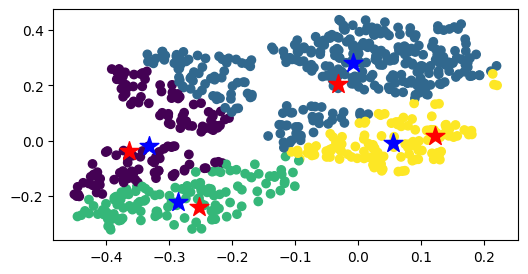

In [12]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [13]:
def MyKMedoide(Dx, K):
  cDx =  paso1_elije_medoides(K, Dx) ## P6. Tu código aquí ##
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx) ## P7. Tu código aquí ##
    # Calcular los nuevos centros
    cDx =  paso3_actualiza_medoides(Dx, cDx, Dyp, K) ## P8. Tu código aquí ##
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

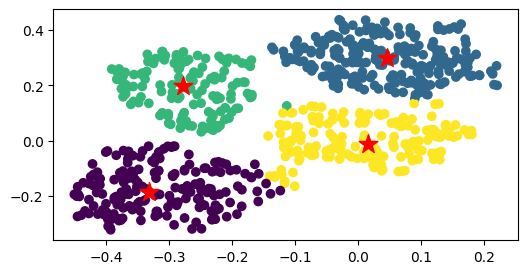

In [14]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


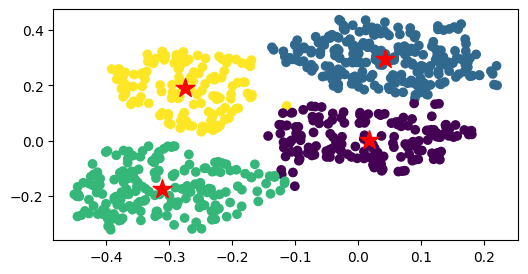

In [15]:
from sklearn.cluster import KMeans

modelo = KMeans(4)
modelo.fit(Dx)
Dyp_sk =  modelo.predict(Dx) ## P9.1 Tu código aquí ##
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_ ## P9.2 Tu código aquí ##

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

#Metricas para K-Medoids
print("Métricas para K-Medoids")
silhouette_kmedoids = silhouette_score(Dx, Dyp)
calinski_harabasz_kmedoids = calinski_harabasz_score(Dx, Dyp)

#Calcular Inercia para K-Medoids
kmedoids_inertia = 0
for i in range(Dx.shape[0]):
    assigned_cluster_idx = int(Dyp[i])
    medoid = cDx[assigned_cluster_idx]
    kmedoids_inertia += distancia_euclidiana(Dx[i], medoid)**2

print(f"Inercia: {kmedoids_inertia:.4f}")
print(f"Silhouette Score: {silhouette_kmedoids:.4f}")
print(f"Calinski-Harabasz: {calinski_harabasz_kmedoids:.4f}")

#Metricas para K-Means
print("\nMétricas para K-Means")
silhouette_kmeans = silhouette_score(Dx, Dyp_sk)
calinski_harabasz_kmeans = calinski_harabasz_score(Dx, Dyp_sk)

#Inercia de KMeans
kmeans_inertia = modelo.inertia_

print(f"Inercia: {kmeans_inertia:.4f}")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Calinski-Harabasz: {calinski_harabasz_kmeans:.4f}")


Métricas para K-Medoids
Inercia: 9.0170
Silhouette Score: 0.5361
Calinski-Harabasz: 1342.4217

Métricas para K-Means
Inercia: 8.8982
Silhouette Score: 0.5362
Calinski-Harabasz: 1346.0006


Conclusiones:

En Inercia K-Means tiene una inercia ligeramente menor con 8.8982 que K-Medoids con una medida de 9.0170, lo que sugiere que los clústeres generados por K-Means son más compactos.
En Silhouette Score ambos algoritmos obtienen puntuaciones muy similares, con K-Means 0.5362, superando por muy poco a K-Medoids que tiene 0.5361. Esto indica que ambos tienen clústeres mejor definidos.
En Calinski-Harabasz K-Means tiene una medida de 1346.0006 y tiene un índice ligeramente superior a K-Medoids que tiene 1342.4217. Un valor alto en este índice sugiere clústeres más densos y mejor separados.

### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


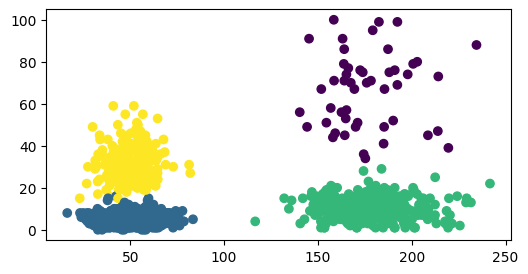

In [18]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

K-Means++ para el nuevo dataset:


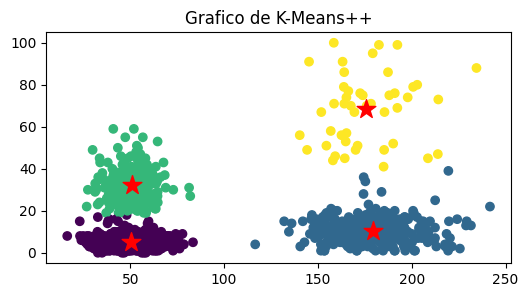

In [22]:
 ## aplica kMeans ++
 ## P11. Tu código aquí ##
from sklearn.cluster import KMeans

modelo_nuevo = KMeans(4)
modelo_nuevo.fit(Dx)
Dyp_sk_nuevo =  modelo_nuevo.predict(Dx)
# Obtener los centros de los clústeres
cDx_sk_nuevo = modelo_nuevo.cluster_centers_

print('K-Means++ para el nuevo dataset:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk_nuevo)
ax.scatter(cDx_sk_nuevo[:,0],cDx_sk_nuevo[:,1], marker='*', s=200, c='r')
plt.title('Grafico de K-Means++')
plt.show()

K-Medoids para el nuevo dataset:


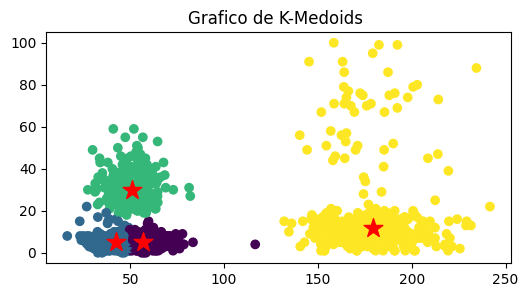

In [24]:
 ## aplica kMedoide
 ## P12. Tu código aquí ##
cDx_nuevo, Dyp_nuevo = MyKMedoide(Dx, 4)

print('K-Medoids para el nuevo dataset:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_nuevo)
ax.scatter(cDx_nuevo[:,0],cDx_nuevo[:,1], marker='*', s=200, c='r')
plt.title('Grafico de K-Medoids ')
plt.show()

# 🚀 ¡TALLER FINALIZADO!"